# Sentiment Analysis

In [20]:
import json
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Load Data

In [2]:
with open('data/processed_trumptwitterarchive.txt', 'r') as data_file:
    json_data = data_file.read()

data = json.loads(json_data)
data[0]

{'source': 'Twitter for iPhone',
 'text': 'Dow hits 28,000 - FIRST TIME EVER, HIGHEST EVER! Gee, Pelosi &amp; Schitt have a good idea, “lets Impeach the President.” If something like that ever happened, it would lead to the biggest FALL in Market History. It’s called a Depression, not a Recession! So much for 401-K’s &amp; Jobs!',
 'created_at': 'Sat Nov 16 15:18:27 +0000 2019',
 'retweet_count': 4301,
 'favorite_count': 15011,
 'is_retweet': False,
 'id_str': '1195722806274736129',
 'tokenized_text': ['Dow',
  'hits',
  '28,000',
  '-',
  'FIRST',
  'TIME',
  'EVER',
  ',',
  'HIGHEST',
  'EVER',
  '!',
  'Gee',
  ',',
  'Pelosi',
  '&',
  'Schitt',
  'have',
  'a',
  'good',
  'idea',
  ',',
  '“',
  'lets',
  'Impeach',
  'the',
  'President',
  '.',
  '”',
  'If',
  'something',
  'like',
  'that',
  'ever',
  'happened',
  ',',
  'it',
  'would',
  'lead',
  'to',
  'the',
  'biggest',
  'FALL',
  'in',
  'Market',
  'History',
  '.',
  'It’s',
  'called',
  'a',
  'Depression',
 

# To dataframe

In [3]:
# data from https://github.com/shekhargulati/sentiment-analysis-python/blob/master/opinion-lexicon-English/positive-words.txt

positive_words = pd.read_csv(r"data/sentimentAnalysis/positive-words.txt",
                             header=None)
negative_words = pd.read_csv(r"data/sentimentAnalysis/negative-words.txt",
                             header=None, encoding='latin-1')
def convert_words_list(df) : 
    words = df
    words_list = words[words[0] != ""][0].tolist()
    return words_list

positive_words_list = convert_words_list(positive_words)
positive_words_list = [i for i in positive_words_list if i not in "trump"]
negative_words_list = convert_words_list(negative_words)
print ( "positive words : " )
print (positive_words_list[:50])
print ( "negative words : " )
print (negative_words_list[:50])

positive_words_list = set(positive_words_list)
negative_words_list = set(negative_words_list)

positive words : 
['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous']
negative words : 
['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted', 'aborts', 'abrade', 'abrasive', 'abrupt', 'abruptly', 'abscond', 'absence', 'absent-minded', 'absentee', 'absurd', 'absurdity', 'absurdly', 'absurdness', 'abuse', 'abused', 'abuses', 'abusive', 'abys

# Method 1: Scoring tweets based on positive and negative words count

- score = positive_count - negative_count 

In [4]:
texts = [" ".join(d['processed_text']) for d in data]
text_dat = pd.DataFrame({'texts':texts})
text_dat.head()

,texts
0,dow hit first time ever highest ever gee pelos...
1,rt armyst lt clint lorance one two u army offi...
2,louisiana vote today great governor
3,good morning louisiana poll open atam get vote...
4,rt big day louisiana tomorrow get vote replace...


In [5]:
def scoring_tweets(data_frame,text_column) :
    #identifying +ve and -ve words in tweets
    data_frame["positive"] = data_frame[text_column].apply(lambda x:" ".join([i for i in x.split() 
                                                                              if i in (positive_words_list)]))
    data_frame["negative"] = data_frame[text_column].apply(lambda x:" ".join([i for i in x.split()
                                                                              if i in (negative_words_list)]))
    #scoring
    data_frame["positive_count"] = data_frame["positive"].str.split().str.len()
    data_frame["negative_count"] = data_frame["negative"].str.split().str.len()
    data_frame["score"]          = (data_frame["positive_count"] -
                                    data_frame["negative_count"])
    
    #create new feature sentiment :
    #+ve if score is +ve , #-ve if score is -ve , # neutral if score is 0
    def labeling(data_frame) :
        if data_frame["score"]   > 0  :
            return "positive"
        elif data_frame["score"] < 0  :
            return "negative"
        elif data_frame["score"] == 0 :
            return "neutral"
    data_frame["score_sentiment"] = data_frame.apply(lambda data_frame:labeling(data_frame),
                                               axis = 1)
        
    return data_frame

text_dat = scoring_tweets(text_dat, 'texts')
text_dat.head()

,texts,positive,negative,positive_count,negative_count,score,score_sentiment
0,dow hit first time ever highest ever gee pelos...,good like lead,impeach fall depression recession,3,4,-1,negative
1,rt armyst lt clint lorance one two u army offi...,,prison,0,1,-1,negative
2,louisiana vote today great governor,great,,1,0,1,positive
3,good morning louisiana poll open atam get vote...,good love protect,,3,0,3,positive
4,rt big day louisiana tomorrow get vote replace...,great,radical,1,1,0,neutral


In [6]:
text_dat["score_sentiment"].value_counts()

positive    19383
neutral     13463
negative     9846
Name: score_sentiment, dtype: int64

# Method 2: using Textblob

In [7]:
text_dat['tb_polarity'] = text_dat['texts'].apply(lambda x: TextBlob(x).sentiment.polarity)
text_dat['tb_subjetivity'] = text_dat['texts'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

Text(0.5, 1.0, 'hist of subjectivity')

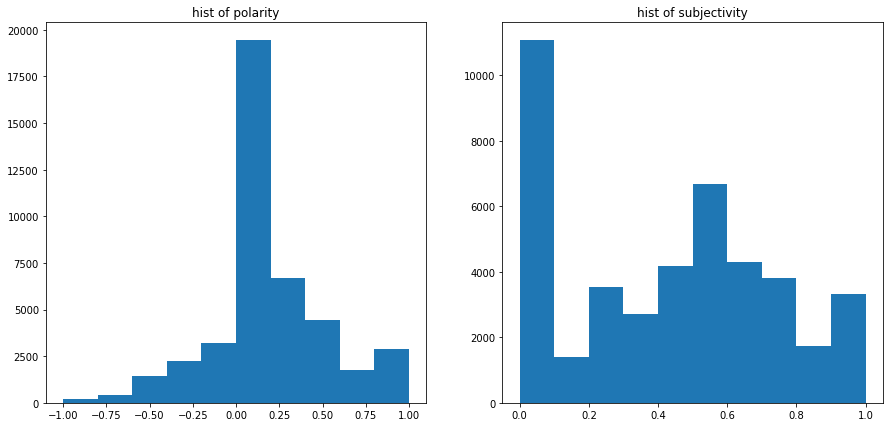

In [8]:
fig, ax = plt.subplots(1,2,figsize = (15,7))
ax[0].hist(text_dat['tb_polarity'])
ax[1].hist(text_dat['tb_subjetivity'])
ax[0].set_title('hist of polarity')
ax[1].set_title('hist of subjectivity')

In [9]:
def labeling(x) :
    if x   > 0  :
        return "positive"
    elif x < 0  :
        return "negative"
    elif x == 0 :
        return "neutral"
text_dat['tb_sentiment'] = text_dat['tb_polarity'].apply(labeling)
text_dat.head()

,texts,positive,negative,positive_count,negative_count,score,score_sentiment,tb_polarity,tb_subjetivity,tb_sentiment
0,dow hit first time ever highest ever gee pelos...,good like lead,impeach fall depression recession,3,4,-1,negative,0.383333,0.377778,positive
1,rt armyst lt clint lorance one two u army offi...,,prison,0,1,-1,negative,0.000000,0.000000,neutral
2,louisiana vote today great governor,great,,1,0,1,positive,0.800000,0.750000,positive
3,good morning louisiana poll open atam get vote...,good love protect,,3,0,3,positive,0.220000,0.360000,positive
4,rt big day louisiana tomorrow get vote replace...,great,radical,1,1,0,neutral,0.312121,0.434848,positive


# visualization

In [10]:
def word_count(data_frame,column) :
    words = data_frame[column].str.split(expand = True)
    words = words.stack().reset_index()[0].value_counts().reset_index()
    words.columns = ["words","count"]
    words = words.sort_values(by = "count",ascending = False)
    words["words"] = words["words"].str.upper()
    return words

pop_pos_words = word_count(text_dat,"positive")
pop_neg_words = word_count(text_dat, "negative")
display(pop_pos_words.head())
display(pop_neg_words.head())

,words,count
0,GREAT,6224
1,THANK,2784
2,LIKE,1663
3,GOOD,1610
4,LOVE,1242


,words,count
0,BAD,837
1,FAKE,792
2,HARD,603
3,CRIME,461
4,PROBLEM,411


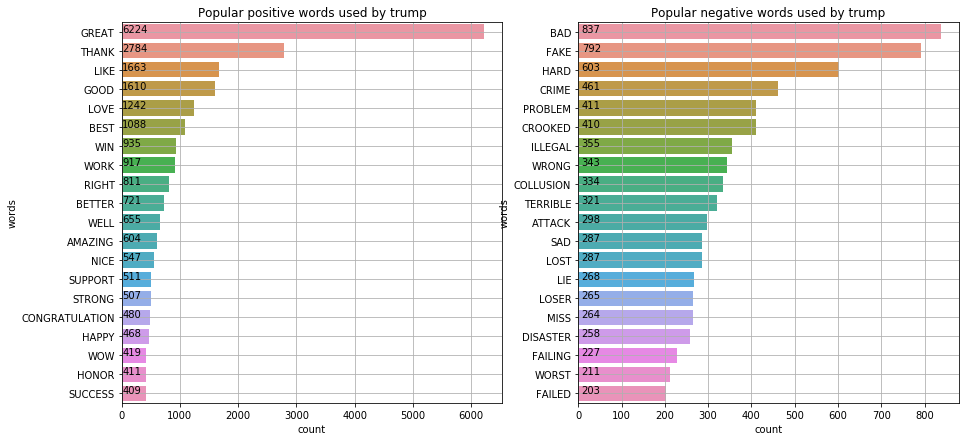

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (15,7))
num = 20

def plot_bar(ax, dat, title = "Popular positive words used by trump"):
    sns.barplot(x = "count" , y = "words" ,
                     data = dat[:num] , 
                     linewidth = 1 , ax = ax)
    ax.grid(True)
    for i,j in enumerate(dat["count"][:num].values) :
        ax.text(8,i,j,fontsize = 10)
    ax.set_title(title)

plot_bar(ax[0],pop_pos_words)
plot_bar(ax[1],pop_neg_words, "Popular negative words used by trump")

In [12]:
# sentiment of tweets by hour of day
times = [d['created_at'] for d in data]
text_dat['time'] = pd.to_datetime(times)
text_dat['hour'] = text_dat['time'].dt.hour
text_dat.head()

,texts,positive,negative,positive_count,negative_count,score,score_sentiment,tb_polarity,tb_subjetivity,tb_sentiment,time,hour
0,dow hit first time ever highest ever gee pelos...,good like lead,impeach fall depression recession,3,4,-1,negative,0.383333,0.377778,positive,2019-11-16 15:18:27+00:00,15
1,rt armyst lt clint lorance one two u army offi...,,prison,0,1,-1,negative,0.000000,0.000000,neutral,2019-11-16 13:56:23+00:00,13
2,louisiana vote today great governor,great,,1,0,1,positive,0.800000,0.750000,positive,2019-11-16 13:51:34+00:00,13
3,good morning louisiana poll open atam get vote...,good love protect,,3,0,3,positive,0.220000,0.360000,positive,2019-11-16 13:08:14+00:00,13
4,rt big day louisiana tomorrow get vote replace...,great,radical,1,1,0,neutral,0.312121,0.434848,positive,2019-11-16 06:03:27+00:00,6


[Text(0, 0.5, 'percentage')]

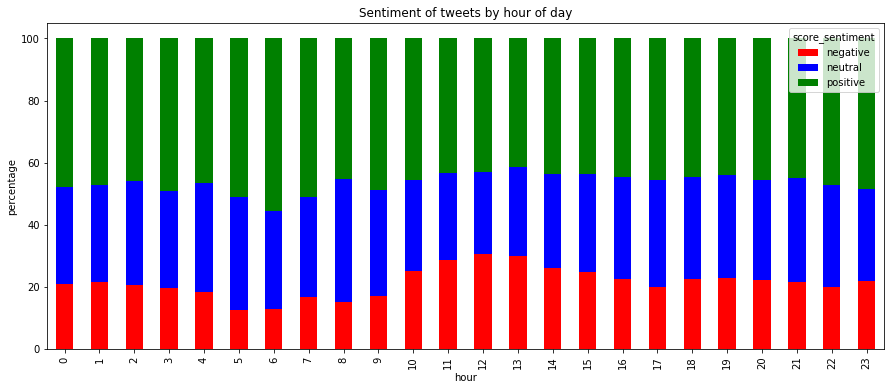

In [13]:
st = pd.crosstab(text_dat['hour'], text_dat['score_sentiment'])
st = st.apply(lambda r:r/r.sum()*100,axis = 1)

fig, ax = plt.subplots(1, 1, figsize = (15,6))
st.plot(kind = 'bar', ax = ax, color = ['r', 'b', 'g'], linewidth = 1, stacked = True)
ax.set_title('Sentiment of tweets by hour of day')
ax.set(ylabel = 'percentage')

In [14]:
text_dat['retweet_count'] = [d['retweet_count']for d in data]
text_dat['favorite_count'] = [d['favorite_count'] for d in data]

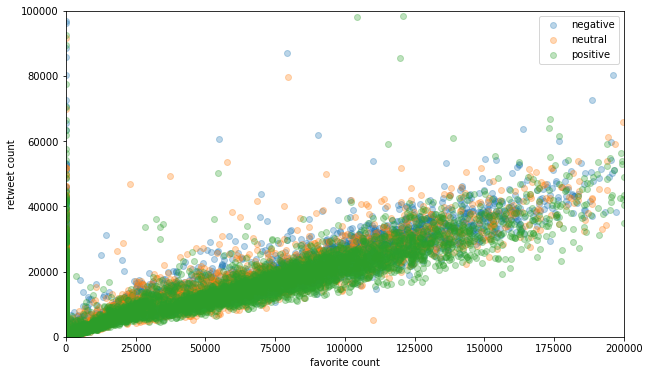

In [15]:
fig, ax = plt.subplots(1, 1, figsize = (10,6))
for i in ['negative', 'neutral', 'positive']:
    ax.scatter(x = text_dat[text_dat["score_sentiment"] == i]["favorite_count"],
                y = text_dat[text_dat["score_sentiment"] == i]["retweet_count"], label = i, alpha = 0.3)
    ax.set_xlim(0,200000)
    ax.set_ylim(0,100000)
    ax.set_xlabel("favorite count")
    ax.set_ylabel("retweet count")
ax.legend()

Text(0.5, 1.0, 'Average retweets and favorites by score sentiment - Trump')

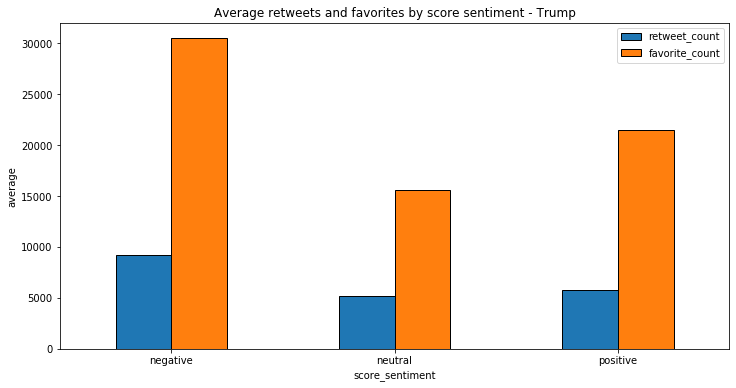

In [16]:
avg_st = text_dat.groupby("score_sentiment")[["retweet_count",
                                                "favorite_count"]].mean()

avg_st.plot(kind = "bar",figsize = (12,6),linewidth = 1,edgecolor = "k")
plt.xticks(rotation = 0)
plt.ylabel("average")
plt.title("Average retweets and favorites by score sentiment - Trump")


[[ 5160  2452  2234]
 [ 1603  6852  5008]
 [  757  2935 15691]]
Confusion matrix, without normalization
[[ 5160  2452  2234]
 [ 1603  6852  5008]
 [  757  2935 15691]]


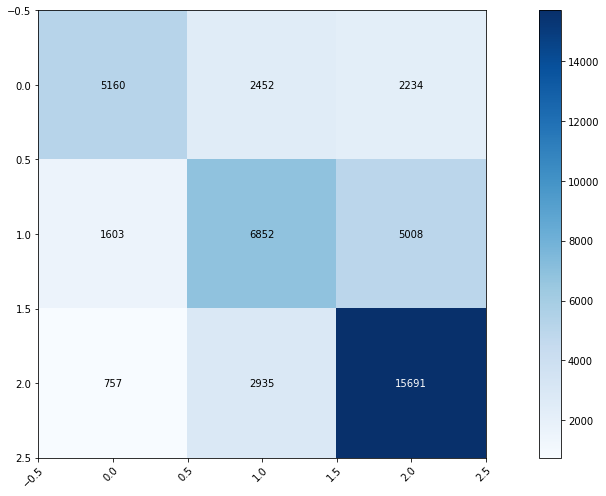

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

cm = confusion_matrix(text_dat['score_sentiment'], text_dat['tb_sentiment'])
print(cm)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize = (15,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    
    ax.figure.colorbar(im, ax=ax)
#     # We want to show all ticks...
#     ax.set(xticks=np.arange(cm.shape[1]),
#            yticks=np.arange(cm.shape[0]),
#            # ... and label them with the respective list entries
#            xticklabels=classes, yticklabels=classes,
#            title=title,
#            ylabel='True label',
#            xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    
    return ax
#['positive', 'neutral', 'negative']
plot_confusion_matrix(text_dat['score_sentiment'],text_dat['tb_sentiment'], np.array(['positive', 'neutral', 'negative']))

In [18]:
text_dat.to_csv('data/sentimentAnalysis/senti.csv', index=False)